## Observations and Insights 

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head(None)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [32]:
# Checking the number of mice.
combined_data["Mouse ID"].count()

1893

In [33]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


combined_mice = combined_data.groupby(["Mouse ID"])
combined_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,0,45.000000,0
1884,z969,Naftisol,Male,9,30,5,49.332999,0
1885,z969,Naftisol,Male,9,30,10,52.656081,1
1886,z969,Naftisol,Male,9,30,15,54.713005,2


In [34]:
# Optional: Get all the data for the duplicate mouse ID. 


In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_data = combined_data.drop_duplicates(subset=["Mouse ID"])
mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [36]:
# Checking the number of mice in the clean DataFrame.
mice_data.count()

Mouse ID              249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
dtype: int64

## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_mean = combined_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
drug_median = combined_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
drug_var = combined_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
drug_std = combined_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
drug_sem = combined_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

drug_table = pd.DataFrame({
    "Mean": drug_mean,
    "Median": drug_median,
    "Variance": drug_var,
    "Standard Deviation": drug_std,
    "SEM": drug_sem,
})
drug_table



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [38]:
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
454,a203,Infubinol,Female,20,23,0,45.0,0
474,a262,Placebo,Female,17,29,0,45.0,0
484,a275,Ceftamin,Female,20,28,0,45.0,0
494,a366,Stelasyn,Female,16,29,0,45.0,0
501,a401,Zoniferol,Female,8,25,0,45.0,0
511,a457,Ketapril,Female,11,30,0,45.0,0
541,a699,Propriva,Female,5,28,0,45.0,0
558,a818,Naftisol,Female,12,28,0,45.0,0


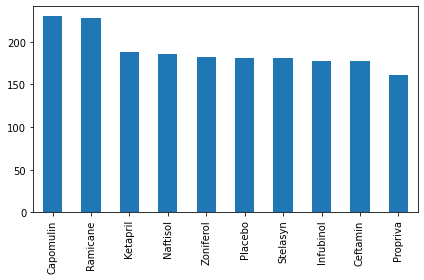

In [60]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_count = combined_data["Drug Regimen"].value_counts()
drug_bars = drug_count.plot(kind="bar")
plt.tight_layout()
drug_names = combined_data.drop_duplicates(subset="Drug Regimen")
drug_names.head(None)

([<matplotlib.axis.XTick at 0x179add7db20>,
 [Text(0, 0, 'Ramicane'),
  Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Placebo'),
  Text(4, 0, 'Ceftamin'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Zoniferol'),
  Text(7, 0, 'Ketapril'),
  Text(8, 0, 'Propriva'),
  Text(9, 0, 'Naftisol')])

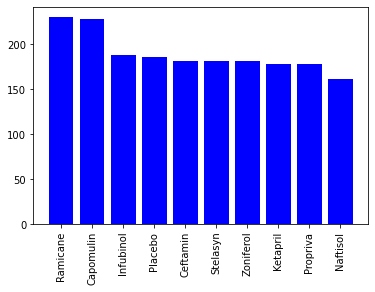

In [64]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug_table))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, drug_count, color="b", align="center")
plt.xticks(tick_locations, drug_names['Drug Regimen'], rotation="vertical")


Male      125
Female    124
Name: Sex, dtype: int64

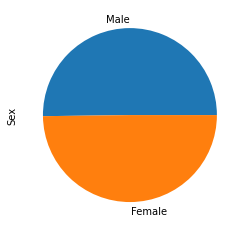

In [93]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = mice_data["Sex"].value_counts()
labels = ["Male", "Female"]
sex_pie = mice_sex.plot.pie()
mice_sex.head()

Male      125
Female    124
Name: Sex, dtype: int64

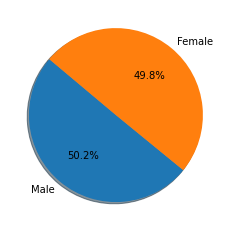

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_sex = mice_data["Sex"].value_counts()


plt.pie(mice_sex, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
mice_sex.head()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
